# Regression using ANN

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
housing=fetch_california_housing()

In [27]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [28]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [29]:
X=pd.DataFrame(housing.data,columns=housing.feature_names)

In [30]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [31]:
y=pd.DataFrame(housing.target,columns=['target'])

In [32]:
y

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [33]:
X_train_full , X_test,y_train_full,y_test=train_test_split(X,y,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [34]:
print(X_train_full.shape)
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(15480, 8)
(11610, 8)
(5160, 8)
(3870, 8)


In [35]:
X_train.shape[1:]

(8,)

In [37]:
LAYERS=[
    tf.keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(1)
                          
                          
]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model = tf.keras.models.Sequential(LAYERS)

2025-07-28 06:47:56.338237: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [44]:
LOSS='mse'
OPTIMIZER='sgd'

model.compile(optimizer=OPTIMIZER,loss=LOSS)

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
scaler=StandardScaler()

In [50]:
X_train=scaler.fit_transform(X_train)
X_valid=scaler.fit_transform(X_valid)
X_test=scaler.fit_transform(X_test)

In [52]:
EPOCHS=20
history=model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.6119 - val_loss: 0.5104
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4417 - val_loss: 0.4417
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3820 - val_loss: 0.4350
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3765 - val_loss: 0.4411
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3687 - val_loss: 0.4237
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3570 - val_loss: 0.4267
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3351 - val_loss: 0.4244
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3450 - val_loss: 0.4138
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3195 - val_loss: 0.4108
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3378 - val_loss: 0.4201
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3301 - val_loss: 0.4187
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [53]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.876477,0.510351
1,0.435205,0.441730
2,0.391760,0.435020
3,0.375046,0.441145
4,0.363966,0.423700
5,0.361913,0.426706
6,0.351314,0.424376
7,0.344982,0.413791
8,0.339447,0.410827
9,0.338424,0.420078


<Axes: >

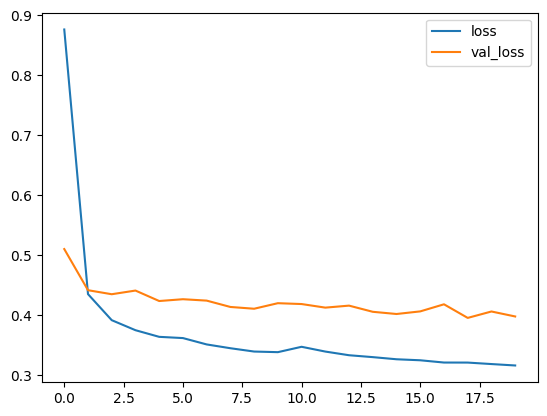

In [54]:
pd.DataFrame(history.history).plot()

In [56]:
model.evaluate(X_test,y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3551


0.35945844650268555

In [57]:
X_test.shape

(5160, 8)

In [59]:
new=X_test[0]

In [60]:
new

array([-1.14772246, -0.3014276 , -0.46356103, -0.13026842, -0.0249129 ,
        0.56243986,  0.22075674,  0.2580042 ])

In [62]:
new.reshape((1,8))

array([[-1.14772246, -0.3014276 , -0.46356103, -0.13026842, -0.0249129 ,
         0.56243986,  0.22075674,  0.2580042 ]])

In [63]:
model.predict(new.reshape((1,8)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


array([[0.66558576]], dtype=float32)

In [64]:
model_2 = tf.keras.models.Sequential(LAYERS)

LOSS = "mse"
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=1e-3)

model_2.compile(loss=LOSS , optimizer=OPTIMIZER)

EPOCHS = 20

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_model.keras", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir="logs")

CALLBACKS = [checkpoint_cb, early_stopping_cb, tensorboard_cb]


history = model_2.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_valid, y_valid), callbacks = CALLBACKS)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3158 - val_loss: 0.3956
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3147 - val_loss: 0.3955
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2984 - val_loss: 0.3969
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3034 - val_loss: 0.3944
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3014 - val_loss: 0.3986
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3024 - val_loss: 0.3961
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3054 - val_loss: 0.3963
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2925 - val_loss: 0.3957
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3125 - val_loss: 0.3974
